In [1]:
!python -m pip install --user --upgrade pip
!pip install --user keras
!pip install --user tensorflow
!pip install --user -U numpy

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Stored in directory: C:\Users\mayingzh\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: C:\Users\mayingzh\AppData\Local\pip\Cache\wheels\ee\98\38\46cbcc5a93cfea5492d19c38562691ddb23b940176c14f7b48
  Stored in directory: C:\Users\mayingzh\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: C:\Users\mayingzh\AppData\Local\pip\Cache\wheels\d7\de\2e\efa132238792efb6459a96e85916ef8597fcb3d2ae51590dfd
Successfully built gast absl-py termcolor wrapt


ERROR: tensorboard 1.14.0 has requirement setuptools>=41.0.0, but you'll have setuptools 39.1.0 which is incompatible.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Requirement already up-to-date: numpy in c:\users\mayingzh\appdata\roaming\python\python36\site-packages (1.16.4)


In [3]:
# Use CPU only
# Only Macbook needs to run this cell
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
import matplotlib.pyplot as plt

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load data and do data normalization

In [2]:
df = pd.read_csv('Options.csv')
df.head()

,ticker,date,exdate,maturity,strike_price,best_offer,impl_volatility,underlying_price,interest_rate,cp_flag_C,cp_flag_P
0,AXP,2013-01-02,2013-01-04,2,60.0,0.03,0.181376,58.75,0.0008,1,0
1,AXP,2013-01-02,2013-01-04,2,62.5,0.05,0.450289,58.75,0.0008,1,0
2,AXP,2013-01-02,2013-01-04,2,65.0,0.05,0.676564,58.75,0.0008,1,0
3,AXP,2013-01-02,2013-01-04,2,67.5,0.50,1.369425,58.75,0.0008,1,0
4,AXP,2013-01-02,2013-01-04,2,70.0,0.01,0.888123,58.75,0.0008,1,0


In [3]:
df = df[df['interest_rate'].notnull()]

In [4]:
y = df['best_offer'].values
X = df[['maturity', 'strike_price', 'impl_volatility', 'underlying_price', 'cp_flag_C', 'cp_flag_P', 'interest_rate']]

In [5]:
# Normalize the data to build a regression neural network model
sc= preprocessing.MinMaxScaler()
X= sc.fit_transform(X)
y= y.reshape(-1,1)
y=sc.fit_transform(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(X_train.shape)
print(y_train.shape)

(1559488, 7)
(1559488, 1)


In [8]:
XX_train, XX_validation, yy_train, yy_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Build a keras Sequential model

In [9]:
# Built Keras sequential model with 3 hidden layer, and after the first hidden layer.
model = Sequential([
    Dense(64, activation='relu', input_shape=(7,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
])

W0626 10:27:01.360829  7592 deprecation_wrapper.py:119] From C:\Users\mayingzh\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0626 10:27:01.372834  7592 deprecation_wrapper.py:119] From C:\Users\mayingzh\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0626 10:27:01.375843  7592 deprecation_wrapper.py:119] From C:\Users\mayingzh\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [22]:
# Enable early stopping based on the loss of validation data
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=25)

In [10]:
# Because it is a simple regression problem, we should custom metrics function
from keras import backend as K
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis = -1))

def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [11]:
# use mean_squared_error to compile regression model loss
model.compile(
  optimizer='adam',
  loss='mse',
  metrics=[rmse, r_square],
)

W0626 10:27:25.071674  7592 deprecation_wrapper.py:119] From C:\Users\mayingzh\AppData\Roaming\Python\Python36\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [12]:
# fit the model
result = model.fit(XX_train, 
                   yy_train,
                   epochs = 200,
                   batch_size=256,
                   validation_data=(XX_validation, yy_validation)
                   #callbacks = [es]
                  )

W0626 10:27:45.490572  7592 deprecation_wrapper.py:119] From C:\Users\mayingzh\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0626 10:27:45.587808  7592 deprecation_wrapper.py:119] From C:\Users\mayingzh\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 1247590 samples, validate on 311898 samples
Epoch 1/200
1247590/1247590 [==============================] - 5s 4us/step - loss: 1.8663e-04 - rmse: 0.0048 - r_square: 0.9826 - val_loss: 2.5641e-05 - val_rmse: 0.0039 - val_r_square: 0.9975
Epoch 2/200
1247590/1247590 [==============================] - 5s 4us/step - loss: 1.5015e-05 - rmse: 0.0027 - r_square: 0.9985 - val_loss: 1.8775e-05 - val_rmse: 0.0032 - val_r_square: 0.9981-05 - rmse: 0.0029 - r_square: 0.9 - ETA: 2s - los
Epoch 3/200
1247590/1247590 [==============================] - 5s 4us/step - loss: 1.1449e-05 - rmse: 0.0023 - r_square: 0.9989 - val_loss: 1.3845e-05 - val_rmse: 0.0026 - val_r_square: 0.9986
Epoch 4/200
1247590/1247590 [==============================] - 6s 4us/step - loss: 9.6179e-06 - rmse: 0.0020 - r_square: 0.9990 - val_loss: 1.0802e-05 - val_rmse: 0.0023 - val_r_square: 0.9989
Epoch 5/200
1247590/1247590 [==============================] - 6s 4us/step - loss: 8.4139e-06 - rmse: 0.0019 - r_square: 0.99

1247590/1247590 [==============================] - 6s 5us/step - loss: 4.4791e-06 - rmse: 0.0012 - r_square: 0.9996 - val_loss: 4.9500e-06 - val_rmse: 0.0013 - val_r_square: 0.9995
Epoch 43/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 4.4562e-06 - rmse: 0.0012 - r_square: 0.9996 - val_loss: 5.2288e-06 - val_rmse: 0.0013 - val_r_square: 0.9995
Epoch 44/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 4.4330e-06 - rmse: 0.0012 - r_square: 0.9996 - val_loss: 3.9929e-06 - val_rmse: 0.0011 - val_r_square: 0.9996
Epoch 45/200
1247590/1247590 [==============================] - 5s 4us/step - loss: 4.4634e-06 - rmse: 0.0012 - r_square: 0.9996 - val_loss: 3.7729e-06 - val_rmse: 0.0011 - val_r_square: 0.9996
Epoch 46/200
1247590/1247590 [==============================] - 5s 4us/step - loss: 4.4173e-06 - rmse: 0.0012 - r_square: 0.9996 - val_loss: 4.1949e-06 - val_rmse: 0.0012 - val_r_square: 0.9996
Epoch 47/200
1247590/1247590 [=============

1247590/1247590 [==============================] - 6s 5us/step - loss: 4.0730e-06 - rmse: 0.0012 - r_square: 0.9996 - val_loss: 3.7543e-06 - val_rmse: 0.0011 - val_r_square: 0.9996
Epoch 85/200
1247590/1247590 [==============================] - 5s 4us/step - loss: 4.0370e-06 - rmse: 0.0011 - r_square: 0.9996 - val_loss: 4.6504e-06 - val_rmse: 0.0012 - val_r_square: 0.9995
Epoch 86/200
1247590/1247590 [==============================] - 5s 4us/step - loss: 4.0797e-06 - rmse: 0.0012 - r_square: 0.9996 - val_loss: 3.9833e-06 - val_rmse: 0.0011 - val_r_square: 0.9996- loss: 4.1181e-06 - rms
Epoch 87/200
1247590/1247590 [==============================] - 5s 4us/step - loss: 4.0605e-06 - rmse: 0.0011 - r_square: 0.9996 - val_loss: 4.1393e-06 - val_rmse: 0.0012 - val_r_square: 0.9996
Epoch 88/200
1247590/1247590 [==============================] - 5s 4us/step - loss: 4.0334e-06 - rmse: 0.0011 - r_square: 0.9996 - val_loss: 4.0693e-06 - val_rmse: 0.0012 - val_r_square: 0.9996
Epoch 89/200
124759

1247590/1247590 [==============================] - 6s 5us/step - loss: 3.8856e-06 - rmse: 0.0011 - r_square: 0.9996 - val_loss: 3.9747e-06 - val_rmse: 0.0012 - val_r_square: 0.9996
Epoch 127/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 3.9134e-06 - rmse: 0.0011 - r_square: 0.9996 - val_loss: 3.9225e-06 - val_rmse: 0.0011 - val_r_square: 0.9996
Epoch 128/200
1247590/1247590 [==============================] - 5s 4us/step - loss: 3.8912e-06 - rmse: 0.0011 - r_square: 0.9996 - val_loss: 3.4395e-06 - val_rmse: 0.0010 - val_r_square: 0.9997
Epoch 129/200
1247590/1247590 [==============================] - 5s 4us/step - loss: 3.8931e-06 - rmse: 0.0011 - r_square: 0.9996 - val_loss: 3.3683e-06 - val_rmse: 0.0010 - val_r_square: 0.9997
Epoch 130/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 3.8820e-06 - rmse: 0.0011 - r_square: 0.9996 - val_loss: 3.7186e-06 - val_rmse: 0.0010 - val_r_square: 0.9996
Epoch 131/200
1247590/1247590 [========

1247590/1247590 [==============================] - 6s 4us/step - loss: 3.7792e-06 - rmse: 0.0011 - r_square: 0.9996 - val_loss: 4.6112e-06 - val_rmse: 0.0012 - val_r_square: 0.9995
Epoch 168/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 3.8071e-06 - rmse: 0.0011 - r_square: 0.9996 - val_loss: 3.4909e-06 - val_rmse: 0.0011 - val_r_square: 0.9997
Epoch 169/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 3.7965e-06 - rmse: 0.0011 - r_square: 0.9996 - val_loss: 3.6263e-06 - val_rmse: 0.0011 - val_r_square: 0.9996
Epoch 170/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 3.7770e-06 - rmse: 0.0011 - r_square: 0.9996 - val_loss: 3.4897e-06 - val_rmse: 0.0010 - val_r_square: 0.9997
Epoch 171/200
1247590/1247590 [==============================] - 5s 4us/step - loss: 3.7920e-06 - rmse: 0.0011 - r_square: 0.9996 - val_loss: 4.4116e-06 - val_rmse: 0.0013 - val_r_square: 0.9996
Epoch 172/200
1247590/1247590 [========

In [24]:
model.save_weights('model.h5')

In [13]:
predictions = model.predict(X_test)
pre_act = sc.inverse_transform(predictions)
print(pre_act[:10])

[[2.9088315e-02]
 [6.5235101e-02]
 [1.1087340e+00]
 [1.6013426e+00]
 [9.0264447e-02]
 [1.2800211e+01]
 [2.9944185e+01]
 [8.8438711e+00]
 [9.3262167e+00]
 [5.0455082e+01]]


In [18]:
y_act = sc.inverse_transform(y_test)

In [19]:
y_act[:10]

array([[2.000e-02],
       [1.200e-01],
       [1.120e+00],
       [1.500e+00],
       [4.000e-02],
       [1.255e+01],
       [3.055e+01],
       [8.300e+00],
       [9.400e+00],
       [5.065e+01]])

## Plot learning curves including R^2 and RMSE

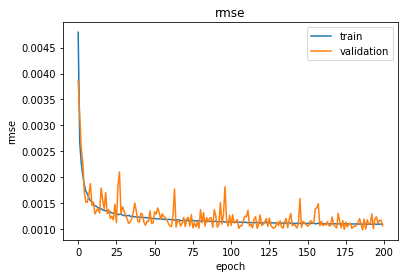

In [14]:
# plot training curve for rmse
plt.plot(result.history['rmse'])
plt.plot(result.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

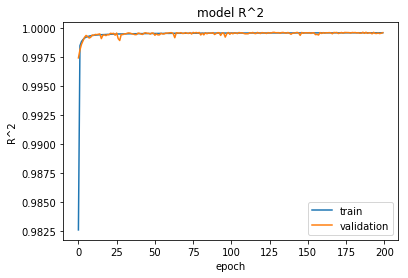

In [15]:
# plot training curve for R^2
plt.plot(result.history['r_square'])
plt.plot(result.history['val_r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [20]:
import sklearn.metrics as skm, math
print("\n")
print("Mean absolute error (MAE):      %f" % skm.mean_absolute_error(y_act,pre_act))
print("Mean squared error (MSE):       %f" % skm.mean_squared_error(y_act,pre_act))
print("Root mean squared error (RMSE): %f" % math.sqrt(skm.mean_squared_error(y_act,pre_act)))
print("R square (R^2):                 %f" % skm.r2_score(y_act,pre_act))



Mean absolute error (MAE):      0.146496
Mean squared error (MSE):       0.070069
Root mean squared error (RMSE): 0.264706
R square (R^2):                 0.999659


## Try dropout

In [23]:
model2 = Sequential([
    Dense(64, activation='relu', input_shape=(7,)),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
])
model2.compile(
  optimizer='adam',
  loss='mse',
  metrics=[rmse, r_square],
)
# fit the model
result2 = model2.fit(XX_train, 
                   yy_train,
                   epochs = 200,
                   batch_size=256,
                   validation_data=(XX_validation, yy_validation),
                   callbacks = [es]
                  )

Train on 1247590 samples, validate on 311898 samples
Epoch 1/200
1247590/1247590 [==============================] - 7s 6us/step - loss: 3.3774e-04 - rmse: 0.0087 - r_square: 0.9678 - val_loss: 1.9030e-04 - val_rmse: 0.0080 - val_r_square: 0.9817
Epoch 2/200
1247590/1247590 [==============================] - 7s 5us/step - loss: 2.8983e-05 - rmse: 0.0034 - r_square: 0.9972 - val_loss: 2.0098e-04 - val_rmse: 0.0073 - val_r_square: 0.9808
Epoch 3/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 1.9616e-05 - rmse: 0.0028 - r_square: 0.9981 - val_loss: 1.6104e-04 - val_rmse: 0.0064 - val_r_square: 0.9848
Epoch 4/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 1.5838e-05 - rmse: 0.0025 - r_square: 0.9984 - val_loss: 1.9723e-04 - val_rmse: 0.0070 - val_r_square: 0.9813
Epoch 5/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 1.4334e-05 - rmse: 0.0024 - r_square: 0.9986 - val_loss: 2.1143e-04 - val_rmse: 0.0074 - val

1247590/1247590 [==============================] - 6s 5us/step - loss: 6.5722e-06 - rmse: 0.0015 - r_square: 0.9994 - val_loss: 1.8226e-04 - val_rmse: 0.0067 - val_r_square: 0.9828
Epoch 44/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 6.6883e-06 - rmse: 0.0015 - r_square: 0.9993 - val_loss: 1.4781e-04 - val_rmse: 0.0059 - val_r_square: 0.9861
Epoch 45/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 6.4507e-06 - rmse: 0.0015 - r_square: 0.9994 - val_loss: 1.4628e-04 - val_rmse: 0.0061 - val_r_square: 0.9862
Epoch 46/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 6.5123e-06 - rmse: 0.0015 - r_square: 0.9994 - val_loss: 1.6996e-04 - val_rmse: 0.0064 - val_r_square: 0.9840
Epoch 47/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 6.5133e-06 - rmse: 0.0015 - r_square: 0.9994 - val_loss: 1.4737e-04 - val_rmse: 0.0059 - val_r_square: 0.9861
Epoch 48/200
1247590/1247590 [=============

In [24]:
predictions2 = model2.predict(X_test)
pre_act2 = sc.inverse_transform(predictions2)
print(pre_act2[:10])
print("\n")
print("Mean absolute error (MAE):      %f" % skm.mean_absolute_error(y_act,pre_act2))
print("Mean squared error (MSE):       %f" % skm.mean_squared_error(y_act,pre_act2))
print("Root mean squared error (RMSE): %f" % math.sqrt(skm.mean_squared_error(y_act,pre_act2)))
print("R square (R^2):                 %f" % skm.r2_score(y_act,pre_act2))

[[ 0.14105938]
 [ 0.45383525]
 [ 1.4506612 ]
 [ 2.0541828 ]
 [ 0.4501266 ]
 [11.754693  ]
 [27.416527  ]
 [ 7.7179933 ]
 [ 9.548293  ]
 [42.440228  ]]


Mean absolute error (MAE):      0.869359
Mean squared error (MSE):       2.887372
Root mean squared error (RMSE): 1.699227
R square (R^2):                 0.985961


## Try batch normalization technique to regularize neurons

In [25]:
from keras.layers.normalization import BatchNormalization
model3 = Sequential([
    BatchNormalization(),
    Dense(64, activation='relu', input_shape=(7,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
])
model3.compile(
  optimizer='adam',
  loss='mse',
  metrics=[rmse, r_square],
)
# fit the model
result3 = model3.fit(XX_train, 
                   yy_train,
                   epochs = 200,
                   batch_size=256,
                   validation_data=(XX_validation, yy_validation),
                   callbacks = [es]
                  )

Train on 1247590 samples, validate on 311898 samples
Epoch 1/200
1247590/1247590 [==============================] - 7s 5us/step - loss: 2.6774e-04 - rmse: 0.0099 - r_square: 0.9738 - val_loss: 4.1092e-05 - val_rmse: 0.0047 - val_r_square: 0.9960
Epoch 2/200
1247590/1247590 [==============================] - 7s 5us/step - loss: 1.6580e-04 - rmse: 0.0073 - r_square: 0.9839 - val_loss: 6.4023e-05 - val_rmse: 0.0046 - val_r_square: 0.9937
Epoch 3/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 1.6055e-04 - rmse: 0.0069 - r_square: 0.9845 - val_loss: 9.2657e-05 - val_rmse: 0.0066 - val_r_square: 0.9910
Epoch 4/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 1.5294e-04 - rmse: 0.0067 - r_square: 0.9852 - val_loss: 3.4704e-05 - val_rmse: 0.0039 - val_r_square: 0.9966
Epoch 5/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 1.4963e-04 - rmse: 0.0066 - r_square: 0.9855 - val_loss: 2.4409e-05 - val_rmse: 0.0031 - val

Epoch 43/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 1.3702e-04 - rmse: 0.0062 - r_square: 0.9868 - val_loss: 2.2971e-05 - val_rmse: 0.0028 - val_r_square: 0.9978
Epoch 44/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 1.3207e-04 - rmse: 0.0061 - r_square: 0.9871 - val_loss: 2.2472e-05 - val_rmse: 0.0029 - val_r_square: 0.9978
Epoch 45/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 1.3419e-04 - rmse: 0.0062 - r_square: 0.9869 - val_loss: 5.2184e-05 - val_rmse: 0.0043 - val_r_square: 0.9949
Epoch 46/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 1.3525e-04 - rmse: 0.0062 - r_square: 0.9869 - val_loss: 5.2180e-05 - val_rmse: 0.0047 - val_r_square: 0.9949
Epoch 47/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 1.3321e-04 - rmse: 0.0061 - r_square: 0.9872 - val_loss: 1.8973e-05 - val_rmse: 0.0025 - val_r_square: 0.9982
Epoch 48/200
1247590/1247590 [

In [26]:
predictions3 = model3.predict(X_test)
pre_act3 = sc.inverse_transform(predictions3)
print(pre_act3[:10])
print("\n")
print("Mean absolute error (MAE):      %f" % skm.mean_absolute_error(y_act,pre_act3))
print("Mean squared error (MSE):       %f" % skm.mean_squared_error(y_act,pre_act3))
print("Root mean squared error (RMSE): %f" % math.sqrt(skm.mean_squared_error(y_act,pre_act3)))
print("R square (R^2):                 %f" % skm.r2_score(y_act,pre_act3))

[[-4.3860190e-02]
 [ 2.1948852e-02]
 [ 1.5370960e+00]
 [ 1.3288963e+00]
 [ 7.9244830e-02]
 [ 1.2244590e+01]
 [ 2.9527538e+01]
 [ 8.7078705e+00]
 [ 9.0483189e+00]
 [ 4.7312302e+01]]


Mean absolute error (MAE):      0.340313
Mean squared error (MSE):       0.346584
Root mean squared error (RMSE): 0.588714
R square (R^2):                 0.998315


## Reference: 
&emsp;&emsp;What does 'Accuracy' mean in Regression? https://github.com/keras-team/keras/issues/7947 <br>
&emsp;&emsp;https://keras.io/metrics/<br>
&emsp;&emsp;Scale, Standardize, or Normalize with Scikit-Learn https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02 <br>
&emsp;&emsp;The Day my Computer Won the Nobel Prize (Neural Network Option Pricing)  https://medium.com/datadriveninvestor/the-day-my-computer-won-the-nobel-prize-neural-network-option-pricing-d29b4379f1d2 <br>